In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from src.dataset import SIModel
from src.approx_bc import abc_rejection_sampler
import seaborn as sns
from scipy.stats import norm, lognorm

In [2]:
beta_true = 0.15

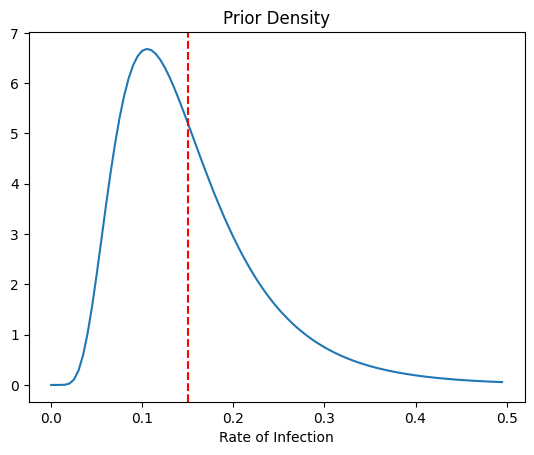

In [3]:
# visualize prior
mu = -2
sigma = 0.5
np.random.seed(10)
x = np.arange(0, 0.5, 0.005)
ax = sns.lineplot(x=x, y=lognorm.pdf(x, scale=np.exp(mu), s=sigma))
ax.set_xlabel("Rate of Infection")
ax.set_title(f"Prior Density")
plt.axvline(beta_true, color="red", linestyle="--")
plt.show()

In [4]:
# change gamma to be non-zero at some point
si_model = SIModel(
    alpha=0.1, gamma=0.0, beta_true=0.15,
    prior_mu=-2, prior_sigma=0.5, n_zones=1,
    N=100, T=52
)

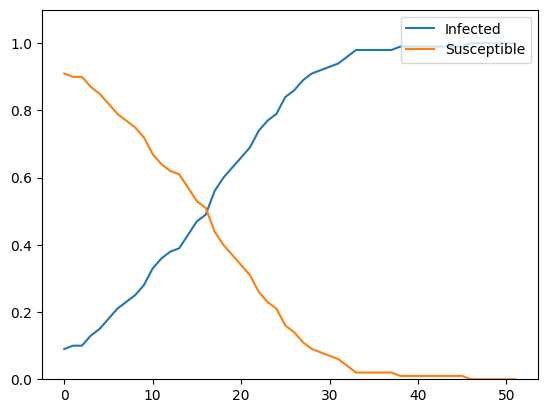

In [5]:
x_o = si_model.get_observed_data()
I_o = np.array(x_o)[0]
S_o  = 1 - I_o
plt.plot(I_o, label="Infected")
plt.plot(S_o, label="Susceptible")
plt.legend(loc="upper right")
plt.ylim(0, 1.1)
plt.show()

Time lapsed: 7.95 seconds
With tolerance 0.001, acceptance rate: 0.033278
Total number of attempts: 3,005


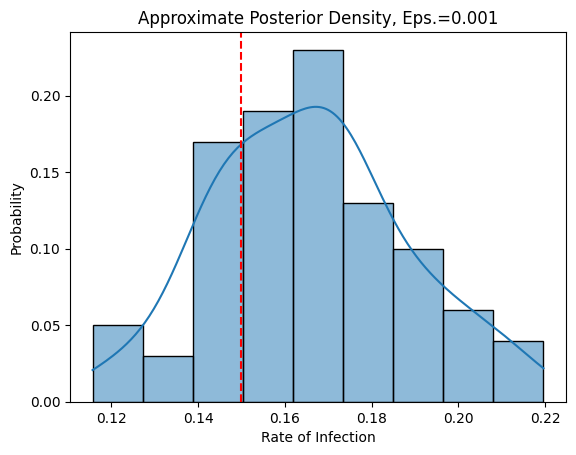

In [11]:
S = 100
epsilon = 0.001
prior_sampler = lambda: si_model.sample_logbeta(1)
simulator = lambda theta, seed: si_model.SI_simulator(theta, seed)

posterior_sample, errors = abc_rejection_sampler(
    S, epsilon, prior_sampler, simulator, x_o,
    )
ax = sns.histplot(np.exp(posterior_sample), stat="probability", kde=True)
# sns.histplot(np.exp(posterior_sample))
ax.set_xlabel("Rate of Infection")
ax.set_title(f"Approximate Posterior Density, Eps.={epsilon}")
plt.axvline(beta_true, color="red", linestyle="--")
plt.show()

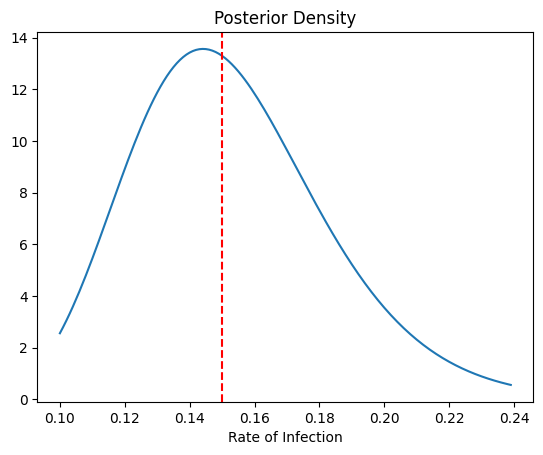

In [29]:
mu = np.log(.15)
sigma = 0.2
np.random.seed(10)
x = np.arange(0.1, 0.24, 0.001)
ax = sns.lineplot(x=x, y=lognorm.pdf(x, scale=np.exp(mu), s=sigma))
ax.set_xlabel("Rate of Infection")
ax.set_title(f"Posterior Density")
plt.axvline(beta_true, color="red", linestyle="--")
plt.show()

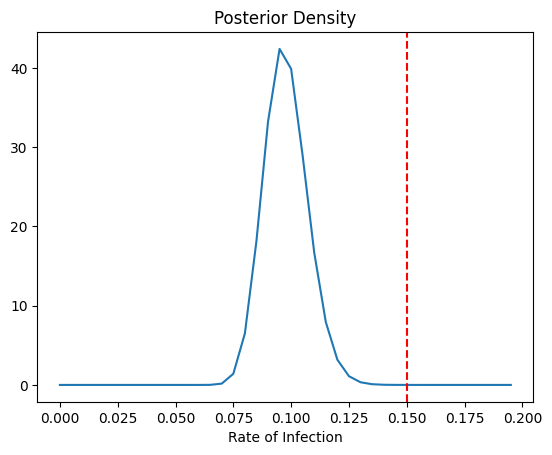

In [25]:
# plot npe
mu = -2.33
sigma = 0.096
np.random.seed(10)
x = np.arange(0, 0.2, 0.005)
ax = sns.lineplot(x=x, y=lognorm.pdf(x, scale=np.exp(mu), s=sigma))
ax.set_xlabel("Rate of Infection")
ax.set_title(f"Posterior Density")
plt.axvline(beta_true, color="red", linestyle="--")
plt.show()